<a href="https://www.pieriandata.com"><img src="../DATA/Logo.jpg"></a>

# Histograms

Check out the video for full details, but here is also a great write-up: http://www.cambridgeincolour.com/tutorials/histograms1.htm

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Image Histograms with OpenCV

Recall that Matplotlib expects the images in a different RGB ordering vs BGR in OpenCV, so if we use OpenCV to calculate anything channel oriented, we'll want to make sure we keep the original RGB ordering, however if we ever want to display the image, then we'll need to convert to the RGB ordering that matplotlib wants.

----

In [17]:
dark_horse = cv2.imread('../DATA/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('../DATA/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('../DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

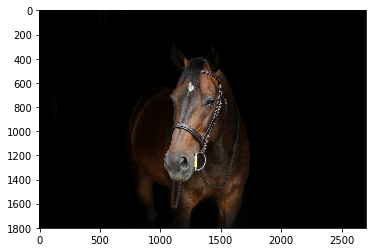

In [18]:
plt.imshow(show_horse)

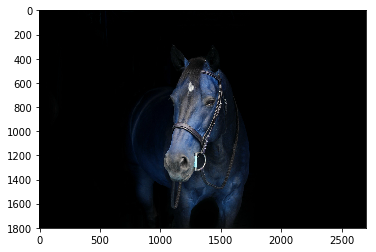

In [19]:
# RECALL MATPLOTLIB IMSHOW EXPECTS THE RGB IN A DIFFERENT ORDER!
# WATCH VIDEO FOR FULL DETAILS PLEASE!
plt.imshow(dark_horse)

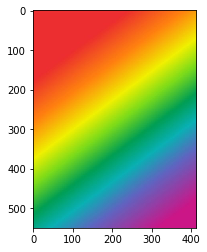

In [20]:
plt.imshow(show_rainbow)

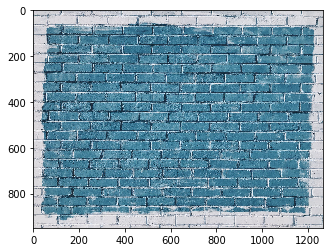

In [21]:
plt.imshow(show_bricks)

### OpenCV Histogram

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

* images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
* channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
* mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
* histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
* ranges : this is our RANGE. Normally, it is [0,256].

In [32]:
hist_values = cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])

In [33]:
hist_values.shape

(256, 1)

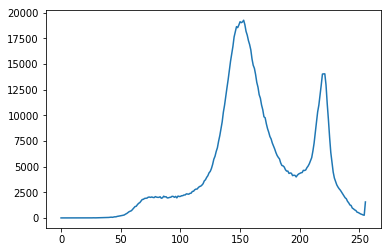

In [34]:
plt.plot(hist_values)

In [35]:
hist_values = cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])

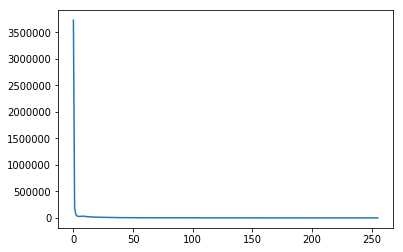

In [37]:
plt.plot(hist_values)

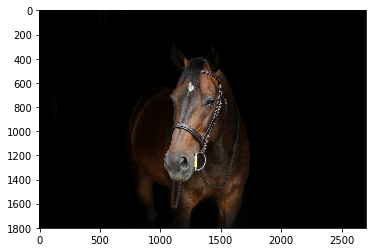

In [40]:
plt.imshow(show_horse)

## Plotting 3 Color Histograms

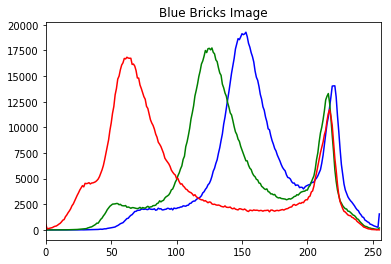

In [42]:
img = blue_bricks
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Blue Bricks Image')
plt.show()

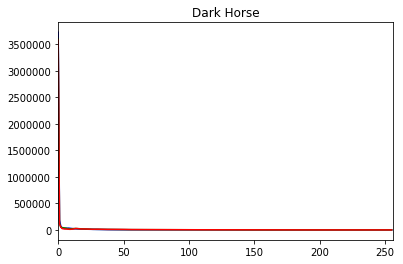

In [44]:
img = dark_horse
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Dark Horse')
plt.show()

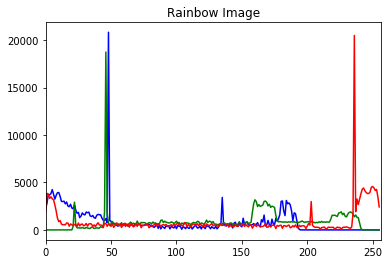

In [47]:
img = rainbow
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Rainbow Image')
plt.show()

### Masking

We can mask only certain parts of the image.

In [48]:
img = rainbow

In [49]:
img.shape

(550, 413, 3)

In [63]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[300:400, 100:400] = 255

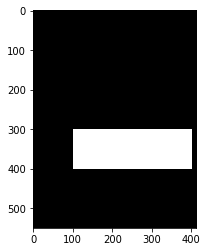

In [64]:
plt.imshow(mask,cmap='gray')

In [65]:
masked_img = cv2.bitwise_and(img,img,mask = mask)
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask = mask)

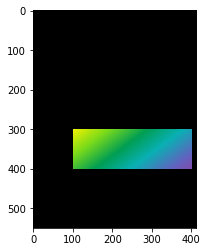

In [66]:
plt.imshow(show_masked_img)

In [70]:
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hist_full_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

plt.show(his

Text(0.5,1,'Histogram for RED values of the full image')

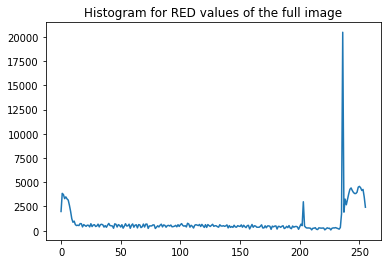

In [79]:
plt.plot(hist_full_values_red)
plt.title('Histogram for RED values of the full image')

Text(0.5,1,'Histogram for RED values for the Masked Area')

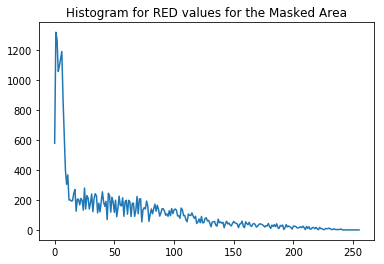

In [81]:
plt.plot(hist_mask_values_red)
plt.title('Histogram for RED values for the Masked Area')

# Histogram Equalization

Make sure to watch the video and also read: https://en.wikipedia.org/wiki/Histogram_equalization

In [90]:
gorilla = cv2.imread('../DATA/gorilla.jpg',0)

In [92]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

## Single Channel (Grayscale)

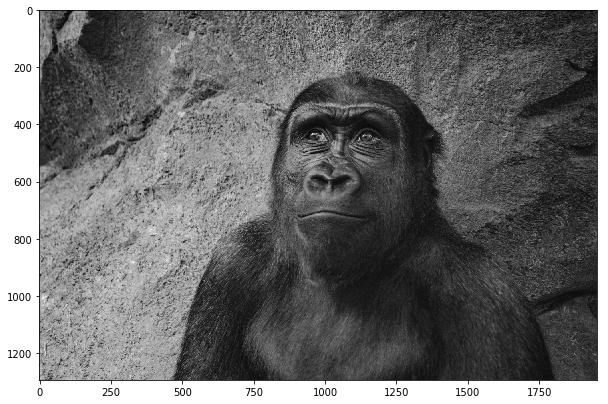

In [95]:
display(gorilla,cmap='gray')

In [100]:
hist_values = cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

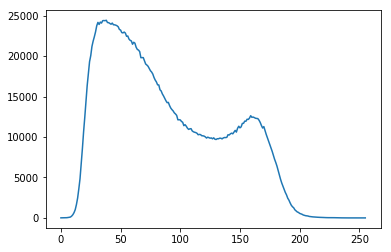

In [101]:
plt.plot(hist_values)

In [102]:
eq_gorilla = cv2.equalizeHist(gorilla)

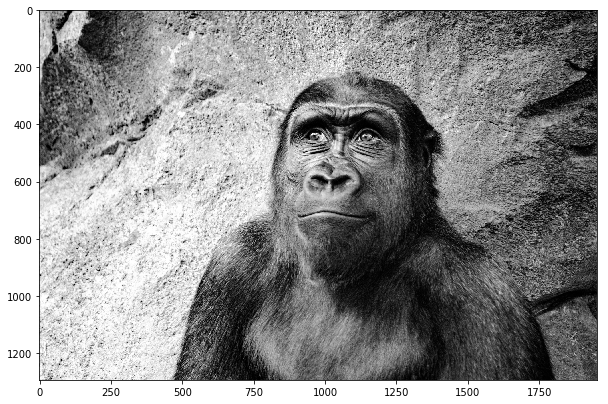

In [103]:
display(eq_gorilla,cmap='gray')

In [105]:
hist_values = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

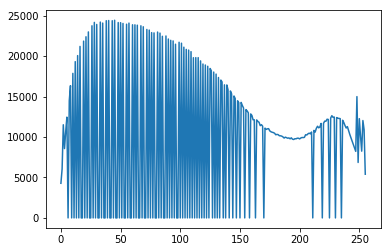

In [106]:
plt.plot(hist_values)

## Color Images

In [126]:
color_gorilla = cv2.imread('../DATA/gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)
# Convert to HSV colorspace
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)

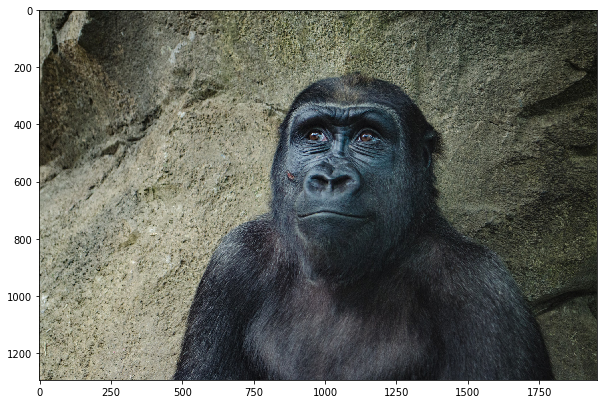

In [127]:
display(show_gorilla)

In [123]:
# Grab V channel
hsv[:,:,2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 197, 184, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [173, 170, 173, ...,  49,  50,  50]], dtype=uint8)

In [124]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

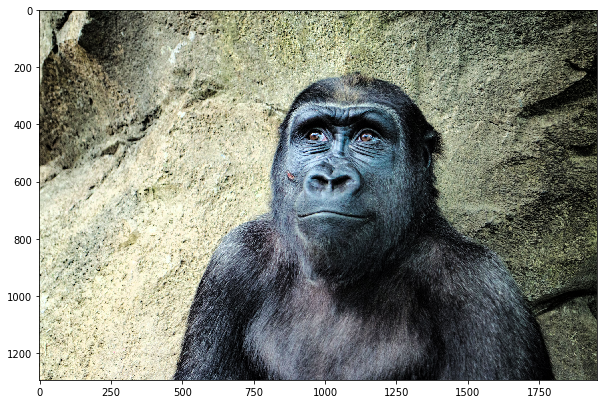

In [125]:
# Convert back to RGB to visualize
eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display(eq_color_gorilla)